In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load the data: update path if needed
df = pd.read_csv(r'C:\Users\HP\Downloads\teen_phone_addiction_dataset.csv')

# Optional: show some rows
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [12]:
# Overview
#print(df.shape)
df.info()
# Prints total number of Missing values column wise
print(df.isnull().sum())

# Fix column names if necessary (strip spaces etc)
df.columns = df.columns.str.strip().str.replace(' ', '_')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [16]:
# Descriptive stats for main columns
#df.describe().T

# Categorical columns check
print(df['Gender'].value_counts())
print(df['Phone_Usage_Purpose'].value_counts())


Gender
Male      1016
Female    1007
Other      977
Name: count, dtype: int64
Phone_Usage_Purpose
Browsing        627
Other           622
Education       602
Social Media    575
Gaming          574
Name: count, dtype: int64


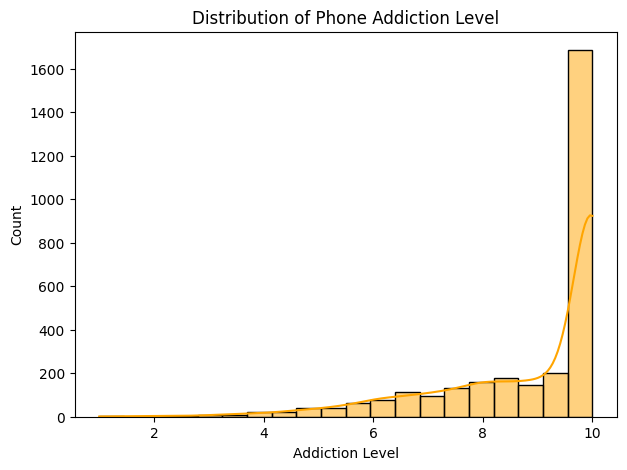

In [22]:
plt.figure(figsize=(7,5))
sns.histplot(df['Addiction_Level'], bins=20, kde=True, color='orange')  #bins: number of bars, KDE: marks the most densly populated region
plt.title('Distribution of Phone Addiction Level')
plt.xlabel('Addiction Level')
plt.ylabel('Count') #counts the number of people who fall under this range
plt.show()


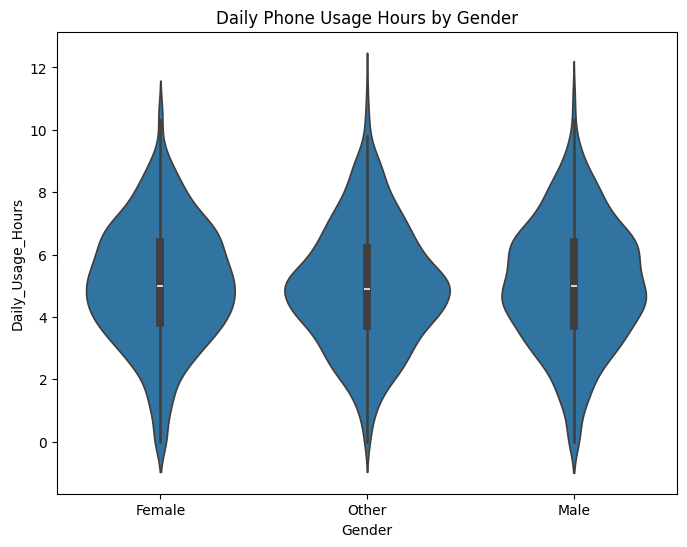

In [28]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Gender', y='Daily_Usage_Hours', data=df)
plt.title('Daily Phone Usage Hours by Gender')
plt.show()


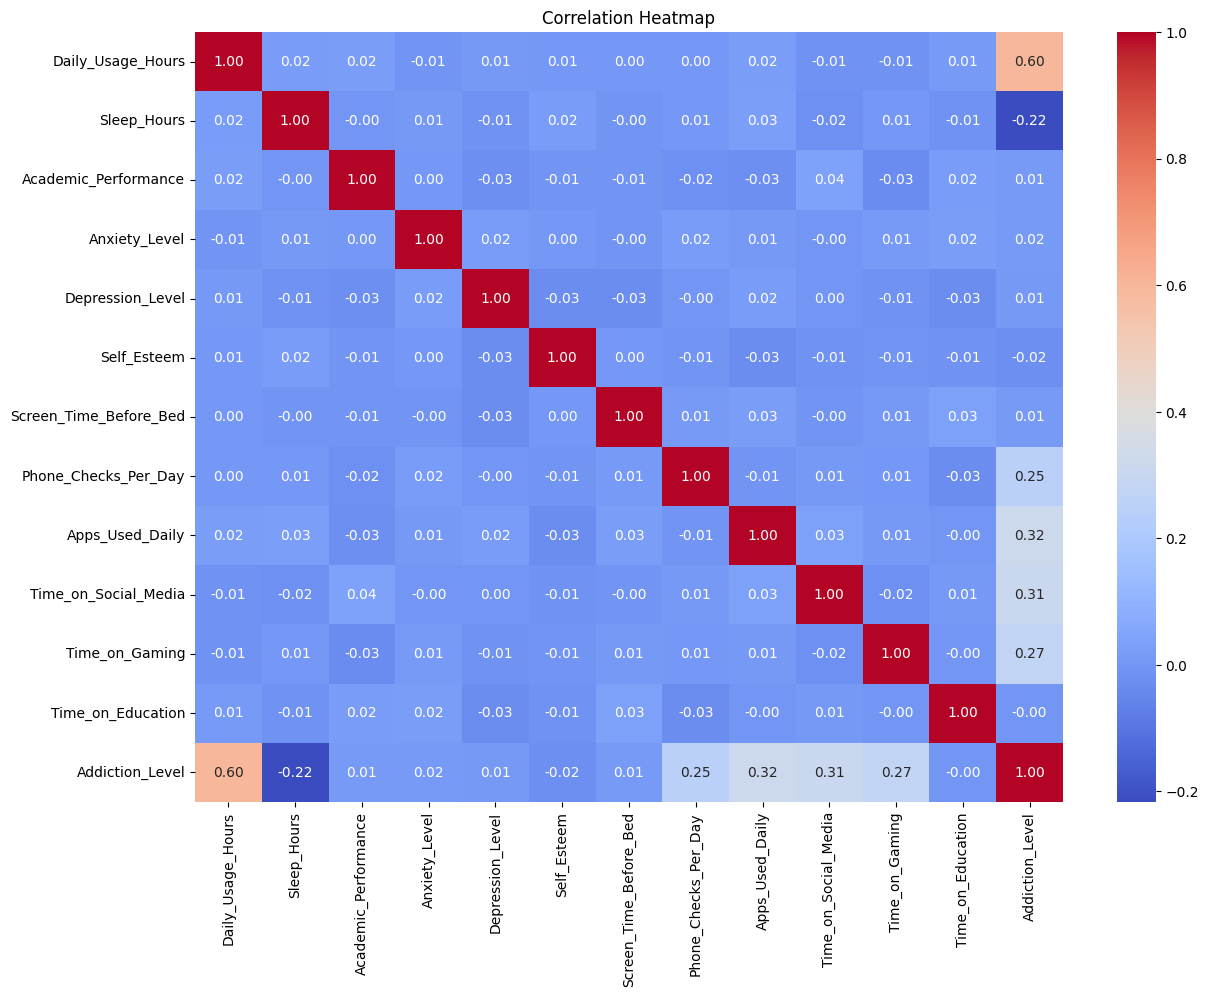

In [65]:
# Select only relevant numerical features
num_cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
            'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Screen_Time_Before_Bed',
            'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 
            'Time_on_Gaming', 'Time_on_Education', 'Addiction_Level']

plt.figure(figsize=(14,10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
# annot: shows the actual anootation, fmt: value upto 2 decimals. 
#+1 strong postitve correlation(red) 0 no correlation(white), -1: strong negative correlation(blue)
plt.title('Correlation Heatmap')
plt.show()


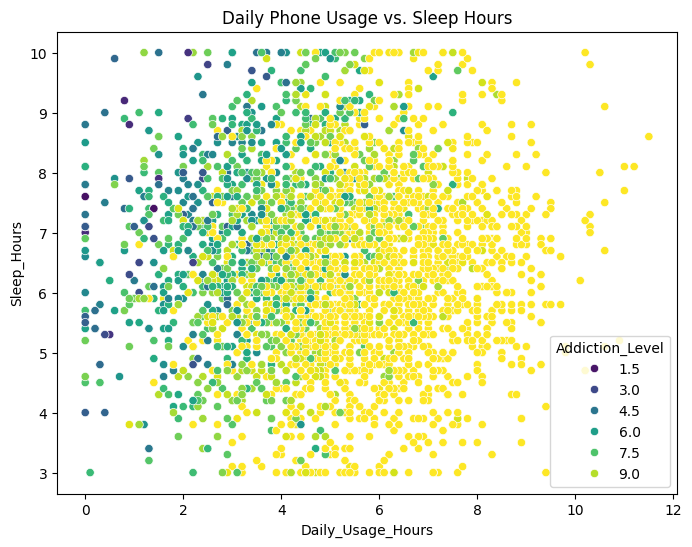

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Daily_Usage_Hours', y='Sleep_Hours', hue='Addiction_Level', data=df, palette='viridis')
plt.title('Daily Phone Usage vs. Sleep Hours')
plt.show()


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


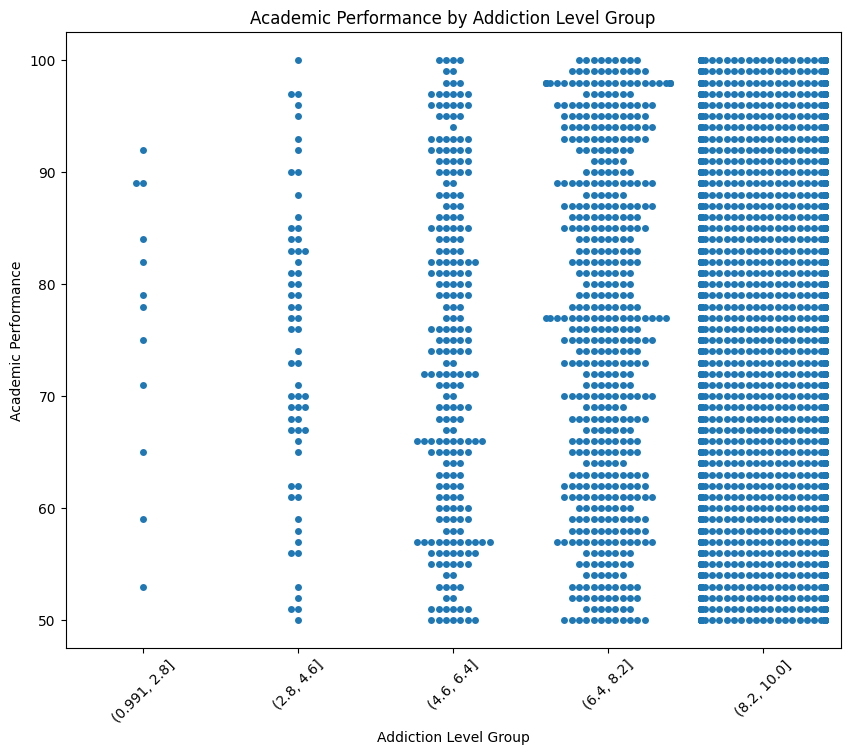

In [52]:
#this suggests a slight negative correlation meaning that there may be slight dip in academic performance because of addiction but there is no drastic impact
plt.figure(figsize=(10, 8))
sns.swarmplot(x=pd.cut(df['Addiction_Level'], bins=5),
              y='Academic_Performance',
              data=df)
plt.title('Academic Performance by Addiction Level Group')
plt.xlabel('Addiction Level Group')
plt.ylabel('Academic Performance')
plt.xticks(rotation=45)  #angle of x-labels
plt.show()


In [59]:
purpose_group = df.groupby('Phone_Usage_Purpose')[['Addiction_Level','Daily_Usage_Hours', 'Anxiety_Level', 'Depression_Level']].mean().sort_values('Daily_Usage_Hours', ascending=True)
print(purpose_group)


                     Addiction_Level  Daily_Usage_Hours  Anxiety_Level  \
Phone_Usage_Purpose                                                      
Social Media                8.750783           4.867304       5.572174   
Education                   8.850997           4.935050       5.838870   
Gaming                      8.957317           5.090244       5.398955   
Browsing                    8.903987           5.095375       5.497608   
Other                       8.941158           5.105788       5.635048   

                     Depression_Level  
Phone_Usage_Purpose                    
Social Media                 5.526957  
Education                    5.495017  
Gaming                       5.343206  
Browsing                     5.456140  
Other                        5.477492  


In [62]:
cols = ['Name', 'Age', 'Gender', 'Daily_Usage_Hours','Sleep_Hours', 'Addiction_Level']
top10 = df.sort_values(by='Daily_Usage_Hours', ascending=False)[cols].head(10)
print(top10)


                  Name  Age  Gender  Daily_Usage_Hours  Sleep_Hours  \
2670  Deborah Gonzalez   16   Other               11.5          8.6   
2400     Lisa Gonzalez   13    Male               11.2          8.1   
710     Pamela Johnson   15    Male               11.0          7.7   
2746       Miranda Lee   15    Male               11.0          8.1   
1665      Brian Pierce   15   Other               10.9          5.2   
1731     Patrick Adams   14  Female               10.6          5.1   
2750       Jamie Salas   15  Female               10.6          7.5   
881     Bridget Santos   18   Other               10.6          6.7   
227    Michael Hopkins   18  Female               10.6          9.1   
582       Julia Rogers   16  Female               10.5          8.0   

      Addiction_Level  
2670             10.0  
2400             10.0  
710              10.0  
2746             10.0  
1665             10.0  
1731             10.0  
2750             10.0  
881              10.0  
22

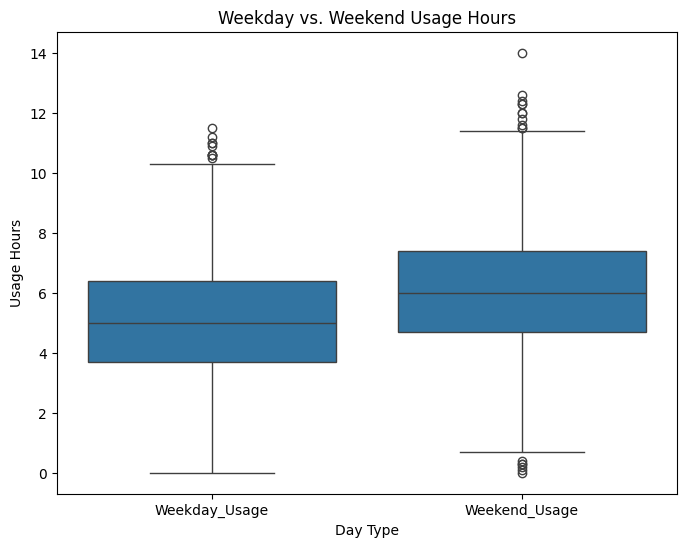

In [63]:
plt.figure(figsize=(8,6))
df['Weekday_Usage'] = df['Daily_Usage_Hours']
df['Weekend_Usage'] = df['Weekend_Usage_Hours']
sns.boxplot(data=pd.melt(df, value_vars=['Weekday_Usage','Weekend_Usage']), x='variable', y='value')
plt.title('Weekday vs. Weekend Usage Hours')
plt.xlabel('Day Type')
plt.ylabel('Usage Hours')
plt.show()


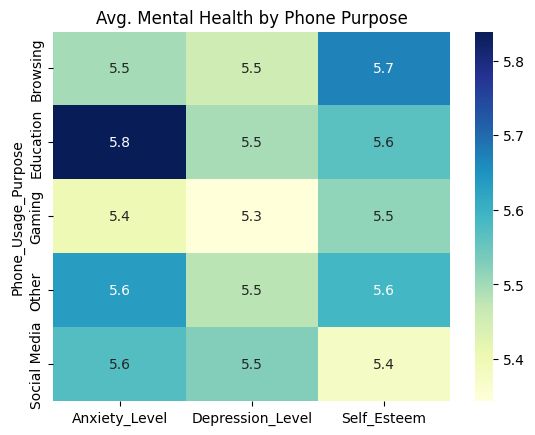

In [66]:
metrics = ['Anxiety_Level', 'Depression_Level', 'Self_Esteem']
purpose_heat = df.groupby('Phone_Usage_Purpose')[metrics].mean()
sns.heatmap(purpose_heat, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Avg. Mental Health by Phone Purpose')
plt.show()
